# Project 1 EDA
**Author: Helena(Yuze) Li (yl6029)**

In [1]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_parquet("flights_clean_feature_engineered.parquet")

print(df.shape)
df.head()

(7061581, 77)


,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,taxi_out_winsor,taxi_in_cap,taxi_in_outlier_flag,taxi_in_winsor,taxi_total_cap,taxi_total_outlier_flag,taxi_total_winsor,excess_elapsed_time_cap,excess_elapsed_time_outlier_flag,excess_elapsed_time_winsor
0,2024,1,1,1,2024-01-01,9E,4814,JFK,NY,New York,...,31.0,37.0,0,7.0,93.0,0,38.0,54.00,0,-14.0
1,2024,1,1,1,2024-01-01,9E,4815,MSP,MN,Minnesota,...,20.0,35.0,0,6.0,71.0,0,26.0,42.00,0,-16.0
2,2024,1,1,1,2024-01-01,9E,4817,JFK,NY,New York,...,21.0,37.0,0,8.0,93.0,0,29.0,54.00,0,-16.0
3,2024,1,1,1,2024-01-01,9E,4817,RIC,VA,Virginia,...,13.0,35.0,0,12.0,69.0,0,25.0,42.11,0,-35.0
4,2024,1,1,1,2024-01-01,9E,4818,DTW,MI,Michigan,...,21.0,36.0,0,4.0,68.0,0,25.0,39.00,0,-9.0


## 1. Time & Calendar Features EDA
### 1.1 Flights by day of week

In [2]:
# @title
df.groupby('day_name')['dep_delay'].agg(['mean','median','std','count'])

,mean,median,std,count
day_name,,,,
Friday,14.589304,-2.0,57.480808,1037087
Monday,12.638753,-2.0,57.076282,1056398
Saturday,12.511694,-2.0,55.759963,898255
Sunday,14.280468,-2.0,57.913455,1029370
Thursday,13.083721,-2.0,55.387123,1024394
Tuesday,10.360308,-3.0,53.780124,961064
Wednesday,10.333572,-3.0,52.636451,958699


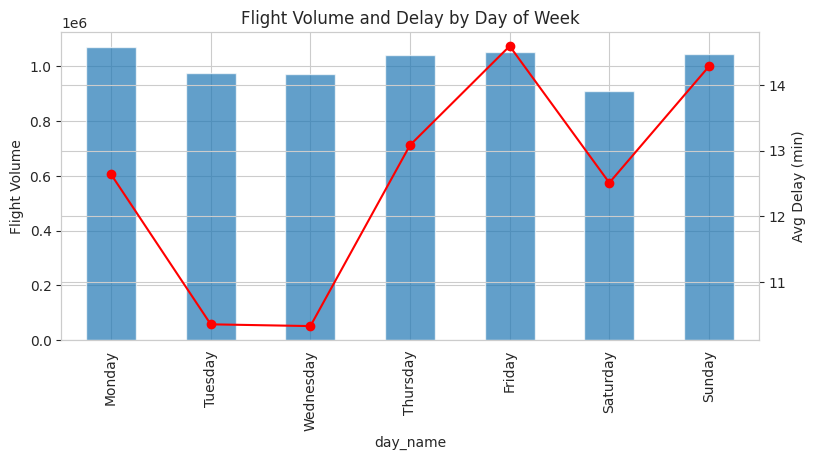

In [3]:
# @title
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

vol = df['day_name'].value_counts().reindex(order)
delay = df.groupby('day_name')['dep_delay'].mean().reindex(order)

fig, ax1 = plt.subplots(figsize=(9,4))

vol.plot(kind='bar', ax=ax1, alpha=0.7)
ax1.set_ylabel("Flight Volume")

ax2 = ax1.twinx()
delay.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel("Avg Delay (min)")

plt.title("Flight Volume and Delay by Day of Week")
plt.show()

### 1.2 Avg departure delay by hour

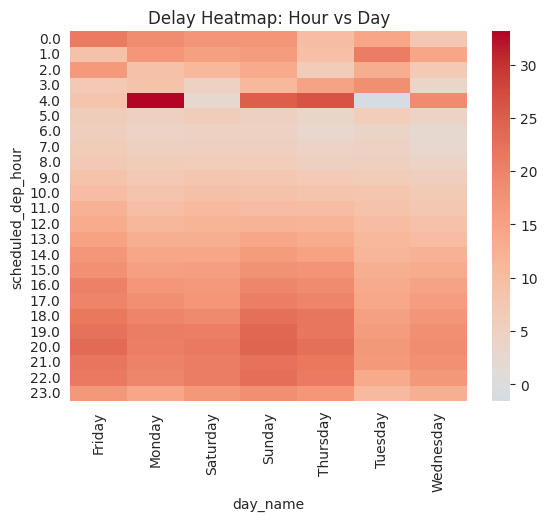

In [4]:
# @title
sns.heatmap(df.pivot_table(values='dep_delay',
                           index='scheduled_dep_hour',
                           columns='day_name',
                           aggfunc='mean'),
            cmap='coolwarm', center=0)
plt.title("Delay Heatmap: Hour vs Day")
plt.show()

###1.3 Weekend vs weekday delay

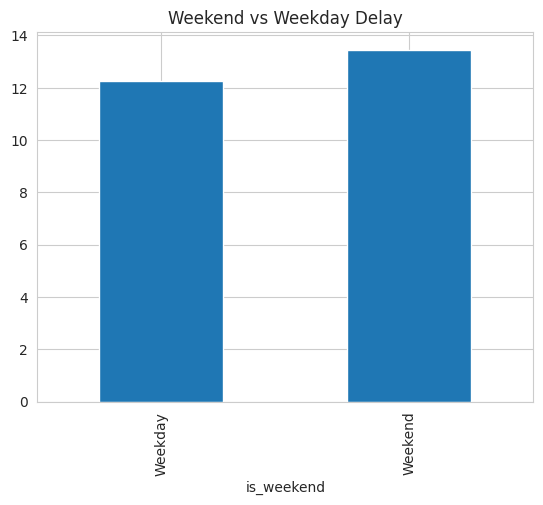

In [5]:
# @title
df.groupby('is_weekend')['dep_delay'].mean().plot(kind='bar')
plt.title("Weekend vs Weekday Delay")
plt.xticks([0,1], ['Weekday','Weekend'])
plt.show()

###1.4 Seasonal cancellation rate

/tmp/ipython-input-259429030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


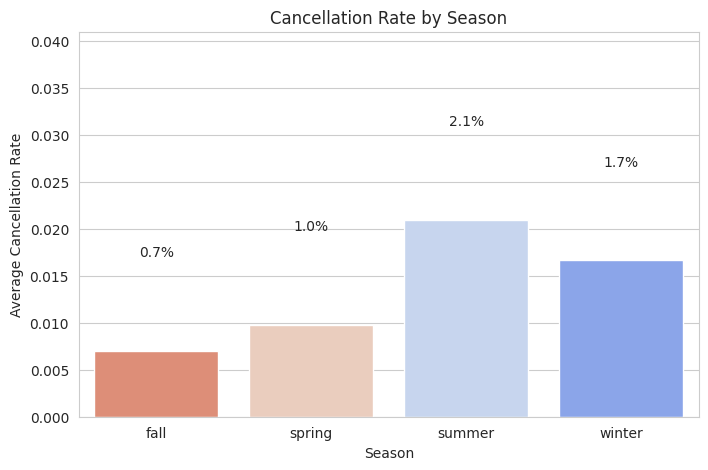

In [6]:
# @title
season_cancel = df.groupby('season')['cancelled'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=season_cancel,
    x='season',
    y='cancelled',
    palette='coolwarm_r'
)

plt.title("Cancellation Rate by Season")
plt.ylabel("Average Cancellation Rate")
plt.xlabel("Season")

plt.ylim(0, season_cancel['cancelled'].max() + 0.02)

for i, row in season_cancel.iterrows():
    plt.text(i, row['cancelled'] + 0.01, f"{row['cancelled']:.1%}", ha='center', fontsize=10)

plt.show()

##2. Delay Outcome Features EDA
###2.1 Distribution of delays

In [7]:
# @title
df[['dep_delay','arr_delay']].describe()

,dep_delay,arr_delay
count,6.965267e+06,6.965267e+06
mean,1.258919e+01,7.098245e+00
std,5.582751e+01,5.799127e+01
min,-9.600000e+01,-1.260000e+02
25%,-6.000000e+00,-1.500000e+01
50%,-2.000000e+00,-6.000000e+00
75%,9.000000e+00,9.000000e+00
max,3.777000e+03,3.803000e+03


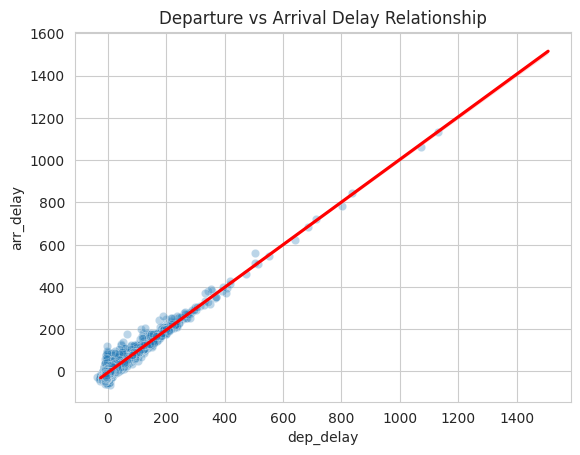

In [8]:
# @title
sns.scatterplot(x='dep_delay', y='arr_delay', data=df.sample(8000), alpha=0.3)
sns.regplot(x='dep_delay', y='arr_delay', data=df.sample(8000), scatter=False, color='red')

plt.title("Departure vs Arrival Delay Relationship")
plt.show()

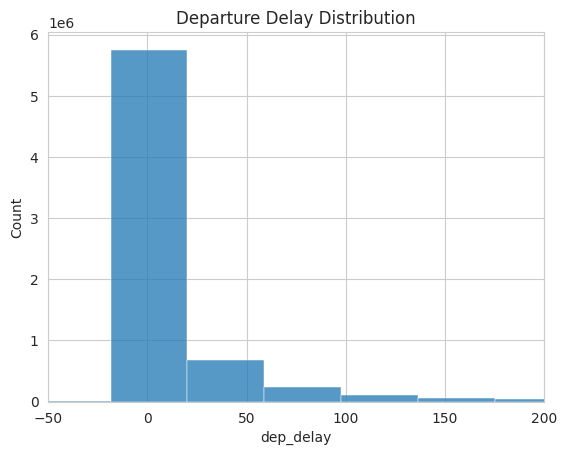

In [9]:
# @title
sns.histplot(df['dep_delay'], bins=100)
plt.xlim(-50,200)
plt.title("Departure Delay Distribution")
plt.show()

###2.2 Delay bucket share

In [10]:
# @title
df.groupby('delay_bucket')['arr_delay'].agg(['mean','count'])

,mean,count
delay_bucket,,
extreme,338.299654,99468
major,100.783419,403263
minor,31.981541,900657
on_time,-9.646999,5561879
unknown,NaN,0


/tmp/ipython-input-3433367592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


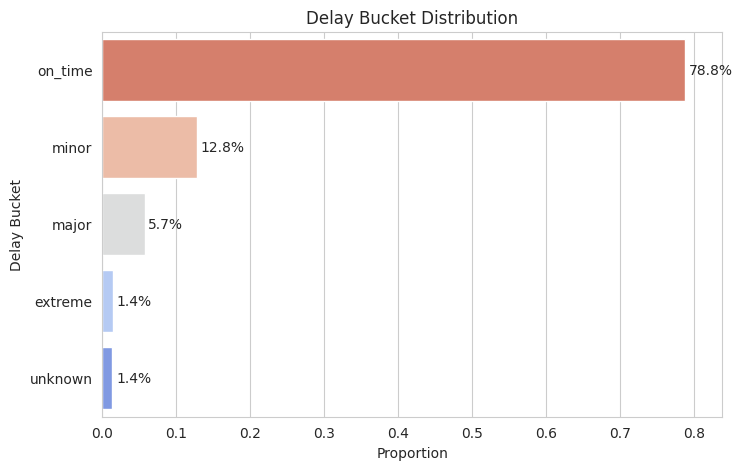

In [11]:
# @title
bucket_share = df['delay_bucket'].value_counts(normalize=True).reset_index()
bucket_share.columns = ['bucket', 'proportion']

bucket_share = bucket_share.sort_values('proportion', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    data=bucket_share,
    y='bucket',
    x='proportion',
    palette='coolwarm_r'
)

for i, row in bucket_share.iterrows():
    plt.text(row['proportion'] + 0.005, i, f"{row['proportion']:.1%}", va='center', fontsize=10)

plt.title("Delay Bucket Distribution")
plt.xlabel("Proportion")
plt.ylabel("Delay Bucket")
plt.xlim(0, bucket_share['proportion'].max() + 0.05)
plt.show()

###2.3 Carrier delay comparison

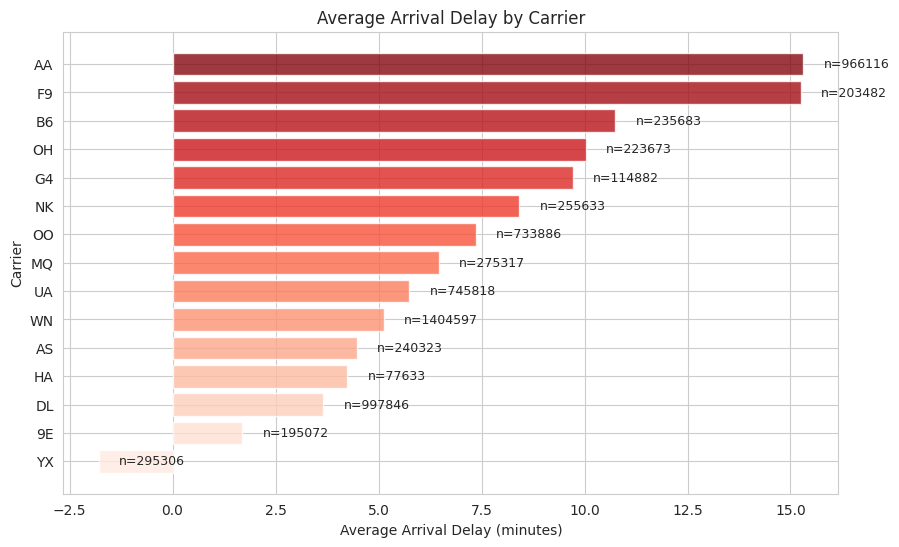

In [12]:
# @title
carrier_stats = df.groupby('op_unique_carrier')['arr_delay'].agg(['mean','count']).sort_values('mean')
carrier_stats = carrier_stats.reset_index()

plt.figure(figsize=(10,6))

colors = sns.color_palette('Reds', len(carrier_stats))
bars = plt.barh(carrier_stats['op_unique_carrier'], carrier_stats['mean'], color=colors, alpha=0.8)

for i, row in carrier_stats.iterrows():
    plt.text(row['mean'] + 0.5, i, f"n={row['count']}", va='center', fontsize=9)

plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Carrier")
plt.title("Average Arrival Delay by Carrier")
plt.show()

##3. Operational Efficiency EDA
###3.1 Taxi time vs delay

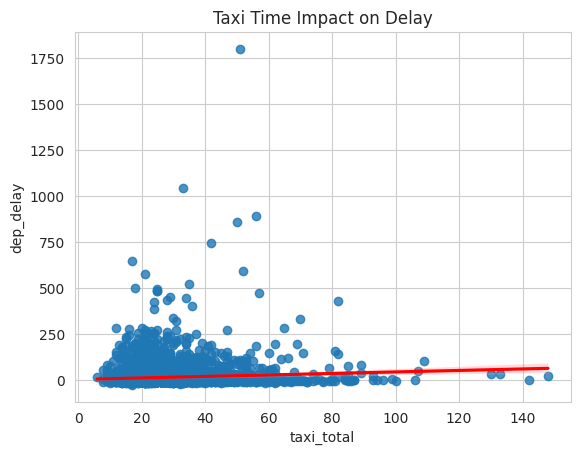

In [13]:
# @title
sns.regplot(
    x='taxi_total',
    y='dep_delay',
    data=df.sample(5000),
    line_kws={'color': 'red'}
)
plt.title("Taxi Time Impact on Delay")
plt.show()

###3.2 Schedule padding distribution

In [14]:
# @title
df[['taxi_out','taxi_in','taxi_total','schedule_padding']].describe()

,taxi_out,taxi_in,taxi_total,schedule_padding
count,6.965267e+06,6.965267e+06,6.965267e+06,6.965267e+06
mean,1.789673e+01,8.318710e+00,2.621544e+01,3.170614e+01
std,9.664173e+00,6.821766e+00,1.191039e+01,1.056666e+01
min,1.000000e+00,1.000000e+00,2.000000e+00,-6.300000e+02
25%,1.200000e+01,5.000000e+00,1.900000e+01,2.500000e+01
50%,1.500000e+01,6.000000e+00,2.400000e+01,3.100000e+01
75%,2.100000e+01,1.000000e+01,3.000000e+01,3.800000e+01
max,2.140000e+02,4.440000e+02,5.000000e+02,8.050000e+02


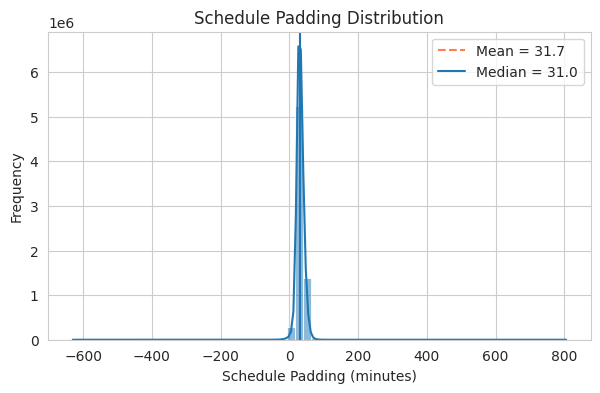

In [15]:
# @title
x = df['schedule_padding'].dropna()

plt.figure(figsize=(7,4))

sns.histplot(x, bins=60, kde=True)

mean_val = x.mean()
median_val = x.median()

plt.axvline(mean_val, linestyle='--', color='coral', label=f"Mean = {mean_val:.1f}")
plt.axvline(median_val, linestyle='-', label=f"Median = {median_val:.1f}")

plt.title("Schedule Padding Distribution")
plt.xlabel("Schedule Padding (minutes)")
plt.ylabel("Frequency")
plt.legend()

plt.show()

###3.3 Air speed sanity check

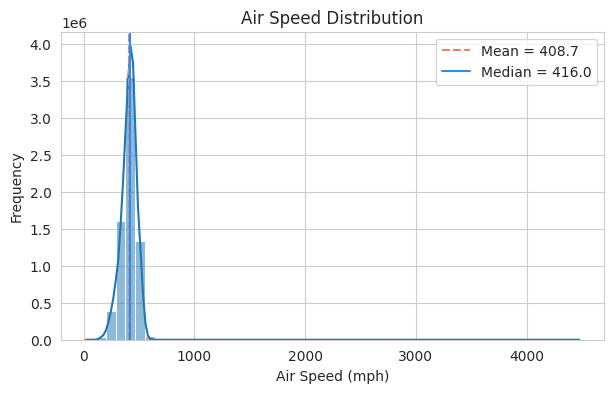

In [16]:
# @title
x = df['air_speed_mph'].dropna()

plt.figure(figsize=(7,4))
sns.histplot(x, bins=50, kde=True)

mean_val = x.mean()
median_val = x.median()

plt.axvline(mean_val, linestyle='--', color='coral', label=f"Mean = {mean_val:.1f}")
plt.axvline(median_val, linestyle='-', color='dodgerblue', label=f"Median = {median_val:.1f}")

plt.title("Air Speed Distribution")
plt.xlabel("Air Speed (mph)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [17]:
# @title
corr_dep = df['air_speed_mph'].corr(df['dep_delay'])
corr_arr = df['air_speed_mph'].corr(df['arr_delay'])

print("Correlation (air speed vs dep delay):", corr_dep)
print("Correlation (air speed vs arr delay):", corr_arr)

Correlation (air speed vs dep delay): 0.018391599045303762
Correlation (air speed vs arr delay): -0.041440942614413154


##4. Airport Baseline Context EDA
###4.1 Top congested origin airports

/tmp/ipython-input-2790749639.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='origin', y='mean_delay', palette='Reds_r')


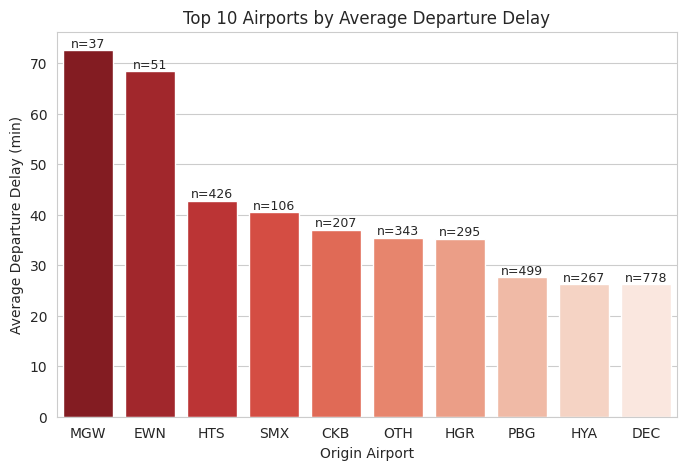

In [18]:
# @title
top10 = df.groupby('origin')[['origin_avg_dep_delay']].agg(['mean','count'])
top10 = top10.sort_values(('origin_avg_dep_delay','mean'), ascending=False).head(10)

top10 = top10.reset_index()
top10.columns = ['origin', 'mean_delay', 'count']

plt.figure(figsize=(8,5))
sns.barplot(data=top10, x='origin', y='mean_delay', palette='Reds_r')

for i, row in top10.iterrows():
    plt.text(i, row['mean_delay'], f"n={row['count']}", ha='center', va='bottom', fontsize=9)

plt.title("Top 10 Airports by Average Departure Delay")
plt.ylabel("Average Departure Delay (min)")
plt.xlabel("Origin Airport")
plt.show()

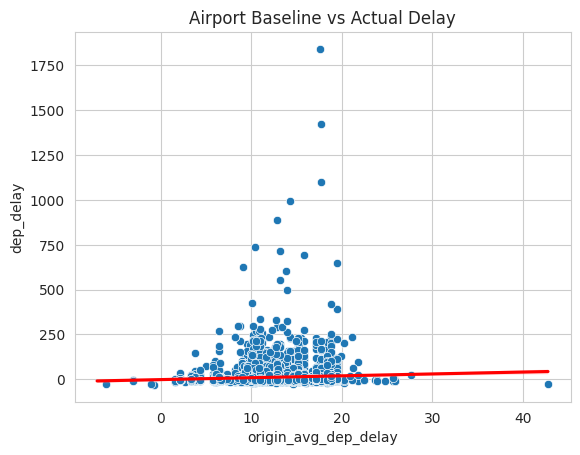

In [19]:
# @title
sns.scatterplot(x='origin_avg_dep_delay', y='dep_delay', data=df.sample(5000))
sns.regplot(x='origin_avg_dep_delay', y='dep_delay', data=df.sample(5000), scatter=False, color='red')
plt.title("Airport Baseline vs Actual Delay")
plt.show()

###4.2 Flights worse than airport baseline

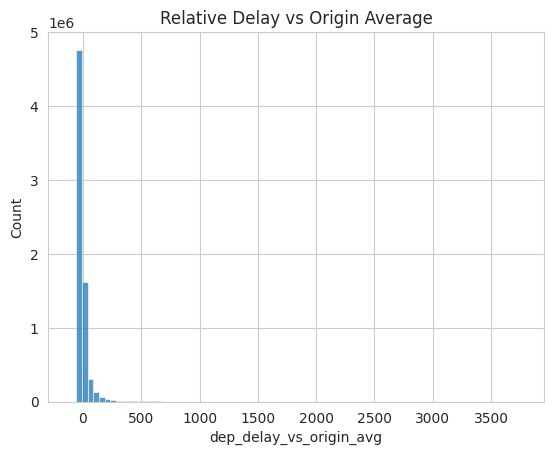

In [20]:
# @title
sns.histplot(df['dep_delay_vs_origin_avg'], bins=80)
plt.title("Relative Delay vs Origin Average")
plt.show()

In [21]:
# @title
df[df['dep_delay_vs_origin_avg'] > 120].head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,taxi_out_winsor,taxi_in_cap,taxi_in_outlier_flag,taxi_in_winsor,taxi_total_cap,taxi_total_outlier_flag,taxi_total_winsor,excess_elapsed_time_cap,excess_elapsed_time_outlier_flag,excess_elapsed_time_winsor
54,2024,1,1,1,2024-01-01,9E,4932,CLT,NC,North Carolina,...,26.0,32.0,0,5.0,69.0,0,31.0,41.0,0,-16.0
239,2024,1,1,1,2024-01-01,9E,5216,RDU,NC,North Carolina,...,17.0,39.0,0,4.0,74.0,0,21.0,46.0,0,-30.0
244,2024,1,1,1,2024-01-01,9E,5225,AVL,NC,North Carolina,...,22.0,41.0,0,10.0,70.0,0,32.0,43.0,0,-6.0
433,2024,1,1,1,2024-01-01,AA,1058,ROC,NY,New York,...,25.0,40.0,0,12.0,67.0,0,37.0,37.0,0,-7.0
485,2024,1,1,1,2024-01-01,AA,1119,MIA,FL,Florida,...,40.0,39.0,0,4.0,79.0,0,44.0,50.0,0,17.0


##5. Route-Level EDA
###5.1 Distance bucket delay

/tmp/ipython-input-360054907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


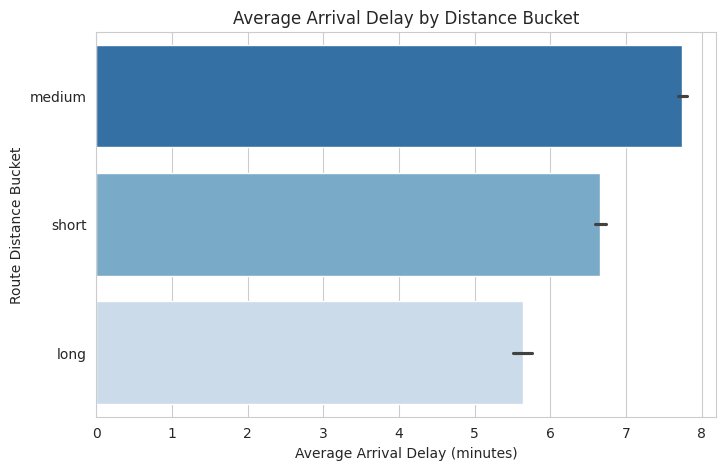

In [22]:
# @title
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    y='route_distance_bucket',
    x='arr_delay',
    palette='Blues_r'
)
plt.title("Average Arrival Delay by Distance Bucket")
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Route Distance Bucket")
plt.show()

###5.2 High-risk routes

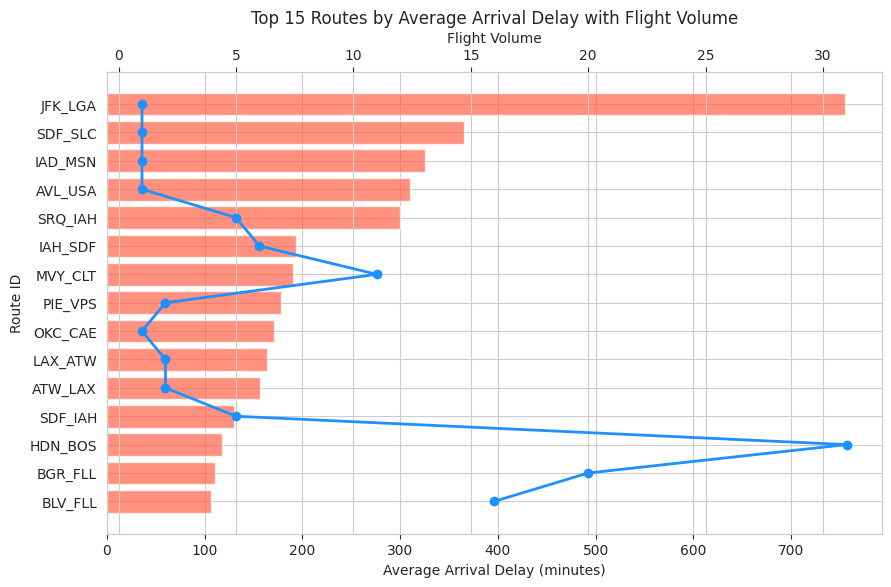

In [23]:
# @title
route_stats = df.groupby('route_id')['arr_delay'].agg(['mean','count'])
route_stats = route_stats.rename(columns={'mean':'avg_delay','count':'volume'})

top_routes = route_stats.sort_values('avg_delay', ascending=False).head(15)

fig, ax1 = plt.subplots(figsize=(10,6))

bars = ax1.barh(top_routes.index, top_routes['avg_delay'], color='tomato', alpha=0.7)
ax1.set_xlabel("Average Arrival Delay (minutes)")
ax1.set_ylabel("Route ID")
ax1.invert_yaxis()

ax2 = ax1.twiny()
ax2.plot(top_routes['volume'], top_routes.index, color='dodgerblue', marker='o', linewidth=2)
ax2.set_xlabel("Flight Volume")

plt.title("Top 15 Routes by Average Arrival Delay with Flight Volume")
plt.show()

###5.3 Route volume vs delay

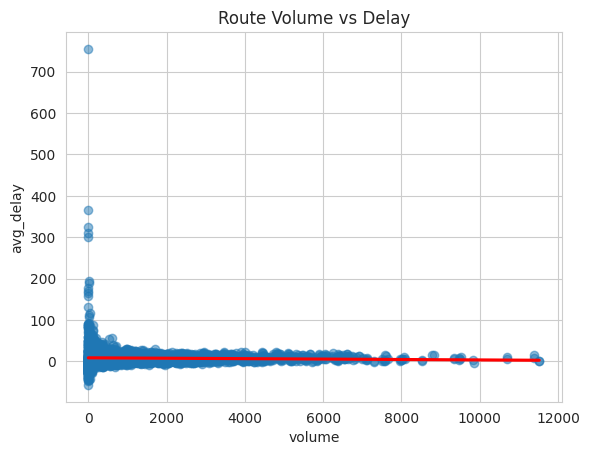

In [24]:
# @title
sns.regplot(data=route_stats, x='volume', y='avg_delay',
            scatter_kws={'alpha':0.5},
            line_kws={'color':'red'})
plt.title("Route Volume vs Delay")
plt.show()

##6. Carrier Behavior EDA
###6.1 Carrier average delay

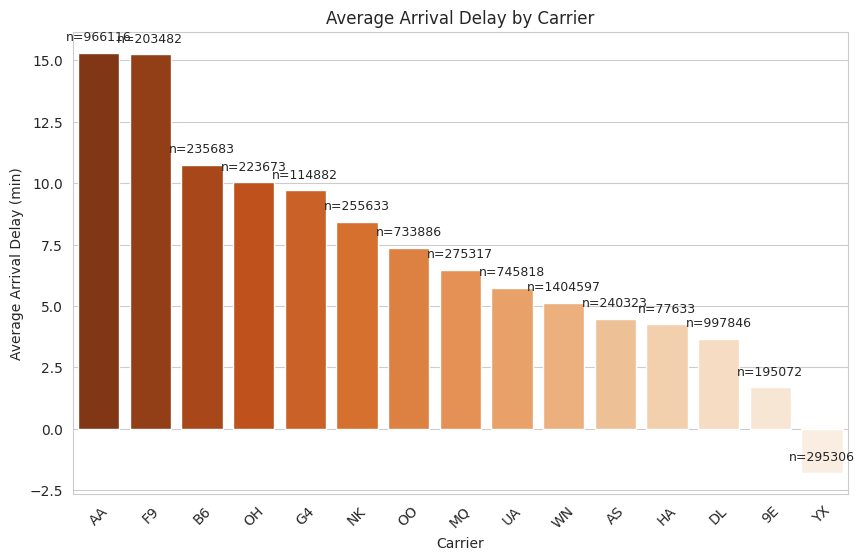

In [25]:
# @title
carrier_stats = df.groupby('op_unique_carrier')['arr_delay'].agg(['mean','std','count']).reset_index()
carrier_stats['se'] = carrier_stats['std'] / (carrier_stats['count'] ** 0.5)

carrier_stats = carrier_stats.sort_values('mean', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=carrier_stats,
    x='op_unique_carrier',
    y='mean',
    errorbar='se',
    hue='op_unique_carrier',
    palette='Oranges_r',
    legend=False
)

plt.xlabel("Carrier")
plt.ylabel("Average Arrival Delay (min)")
plt.title("Average Arrival Delay by Carrier")
plt.xticks(rotation=45)
for i, row in enumerate(carrier_stats.itertuples()):
    plt.text(i, row.mean + 0.5, f"n={row.count}", ha='center', fontsize=9)
plt.show()

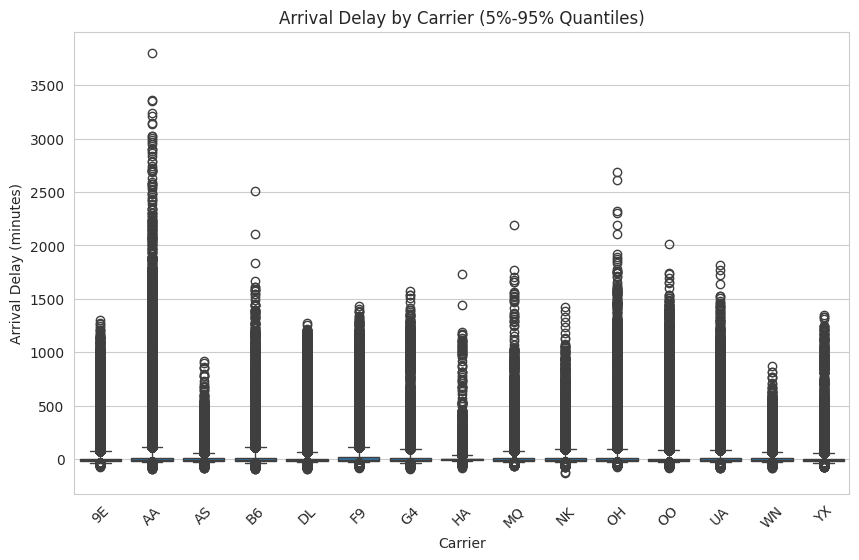

In [26]:
# @title
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='op_unique_carrier',
    y='arr_delay',
    whis=[5,95]
)
plt.title("Arrival Delay by Carrier (5%-95% Quantiles)")
plt.xlabel("Carrier")
plt.ylabel("Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

###6.2 Carrier performance by airport

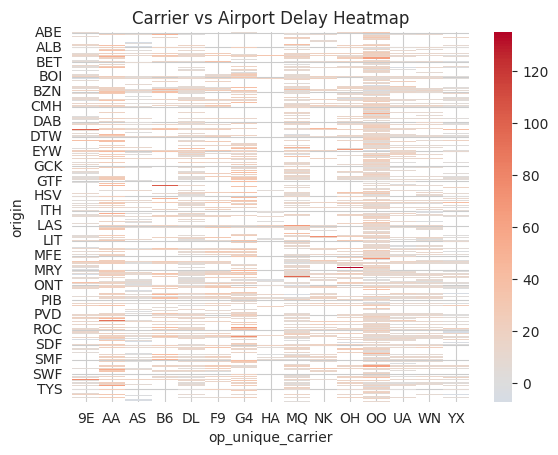

In [27]:
# @title
pivot = df.pivot_table(values='dep_delay',
                       index='origin',
                       columns='op_unique_carrier',
                       aggfunc='mean')

sns.heatmap(pivot, cmap='coolwarm', center=0)
plt.title("Carrier vs Airport Delay Heatmap")
plt.show()

##7. Delay Attribution EDA
###7.1 Share of delay causes

/tmp/ipython-input-2704453147.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


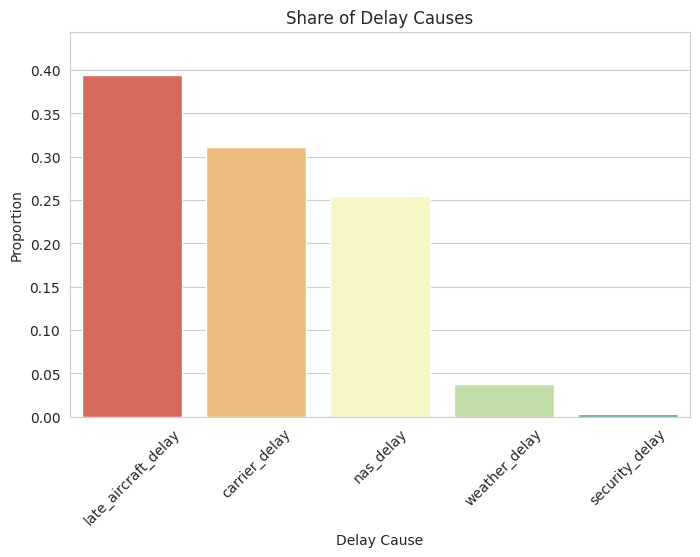

In [28]:
# @title
delay_share = df['primary_delay_cause'].value_counts(normalize=True).reset_index()
delay_share.columns = ['cause', 'proportion']

plt.figure(figsize=(8,5))

colors = sns.color_palette('Spectral_r', len(delay_share))[::-1]

sns.barplot(
    data=delay_share,
    x='cause',
    y='proportion',
    palette=colors
)

plt.title("Share of Delay Causes")
plt.ylabel("Proportion")
plt.xlabel("Delay Cause")
plt.xticks(rotation=45)
plt.ylim(0, delay_share['proportion'].max() + 0.05)
plt.show()

###7.2 Weather delay by season

/tmp/ipython-input-3487628055.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


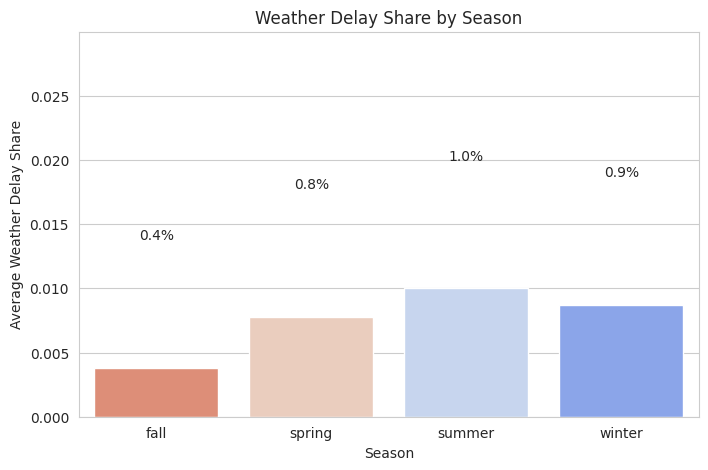

In [29]:
# @title
season_stats = df.groupby('season')['weather_delay_share'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=season_stats,
    x='season',
    y='weather_delay_share',
    palette='coolwarm_r'
)

plt.title("Weather Delay Share by Season")
plt.ylabel("Average Weather Delay Share")
plt.xlabel("Season")
plt.ylim(0, season_stats['weather_delay_share'].max() + 0.02)

for i, row in season_stats.iterrows():
    plt.text(i, row['weather_delay_share'] + 0.01, f"{row['weather_delay_share']:.1%}", ha='center', fontsize=10)

plt.show()

##8. Outlier
###8.1 Outlier rate summary

In [30]:
# @title
summary = []

outlier_flag_cols = [col for col in df.columns if col.endswith('_outlier_flag')]

cols = [col.replace('_outlier_flag', '') for col in outlier_flag_cols]

for col in cols:
    summary.append({
        "feature": col,
        "outlier_rate": df[f"{col}_outlier_flag"].mean()
    })

pd.DataFrame(summary)

,feature,outlier_rate
0,taxi_out,0.009503
1,taxi_in,0.009445
2,taxi_total,0.009588
3,excess_elapsed_time,0.009570


In [31]:
# @title
